<a href="https://colab.research.google.com/github/HARSHIT097/HAPPS/blob/master/Analytics_Christmas_sales_codiInv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Our toy store need to generate 5.7М rupess profit.
Other way we need to close it :(

![](https://media.timeout.com/images/105361021/image.jpg)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lnklnklnk/codinginvaders/main/christmas_sale_2019.csv")

df.head(10)

,date,category,count,purchase_price,sale_price,in_stock_eod
0,2019-12-19,Games & Puzzles,200,567,1090,3854
1,2019-12-20,Games & Puzzles,190,567,1090,3664
2,2019-12-21,Games & Puzzles,232,567,1090,3432
3,2019-12-22,Games & Puzzles,227,567,1090,3205
4,2019-12-23,Games & Puzzles,210,567,1090,2995
5,2019-12-24,Games & Puzzles,234,567,1090,2761
6,2019-12-25,Games & Puzzles,226,567,1090,2535
7,2019-12-19,Education & Construction Toys,146,2450,3990,401
8,2019-12-20,Education & Construction Toys,160,2450,3990,241
9,2019-12-21,Education & Construction Toys,160,2450,3990,81


In [3]:
# Let's add a new column with revenue
df['revenue'] = df['count'] * df['sale_price']

In [4]:
# Display the top 10 lines of the table
### YOUR CODE HERE
df.head(10)

,date,category,count,purchase_price,sale_price,in_stock_eod,revenue
0,2019-12-19,Games & Puzzles,200,567,1090,3854,218000
1,2019-12-20,Games & Puzzles,190,567,1090,3664,207100
2,2019-12-21,Games & Puzzles,232,567,1090,3432,252880
3,2019-12-22,Games & Puzzles,227,567,1090,3205,247430
4,2019-12-23,Games & Puzzles,210,567,1090,2995,228900
5,2019-12-24,Games & Puzzles,234,567,1090,2761,255060
6,2019-12-25,Games & Puzzles,226,567,1090,2535,246340
7,2019-12-19,Education & Construction Toys,146,2450,3990,401,582540
8,2019-12-20,Education & Construction Toys,160,2450,3990,241,638400
9,2019-12-21,Education & Construction Toys,160,2450,3990,81,638400


In [5]:
# Let's calculate how much sales did we get!
df['revenue'].sum()

12766840

In [6]:
# Let's add a new column with total cost price
df['total_cost'] = df['count'] * df['purchase_price']
df['total_cost'].sum()

7801153

In [7]:
# Let's add a profit column. 
# Profit = Revenue - Total Cost

### YOUR CODE HERE
df['profit'] = df['revenue'] * df['total_cost']


profit = df['profit'].sum()
profit

3229730286850

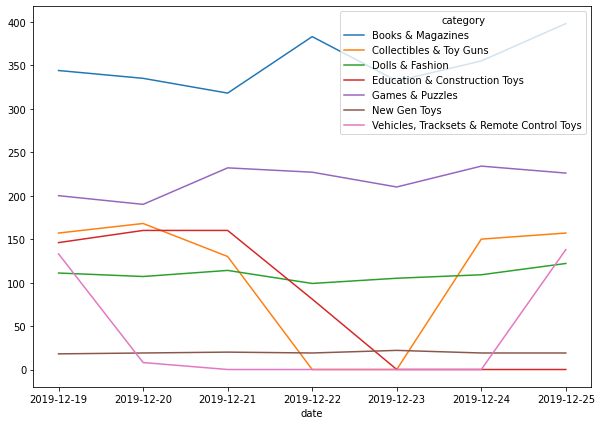

In [8]:
# Let's make a visualisation of our sales per category per day
df.groupby(['date','category']).sum()['count'].unstack().plot(figsize=(10, 7))

Does it looks OK?

In [19]:
# List of all categories
df['category'].unique()

array(['Games & Puzzles', 'Education & Construction Toys',
       'Dolls & Fashion', 'Collectibles & Toy Guns', 'Books & Magazines',
       'Vehicles, Tracksets & Remote Control Toys', 'New Gen Toys'],
      dtype=object)

In [20]:
# Let's take a view on dolls category that looks OK
df.loc[df['category'] == 'Games & Puzzles']

,date,category,count,purchase_price,sale_price,in_stock_eod,revenue,total_cost,profit
0,2019-12-19,Games & Puzzles,200,567,1090,3854,218000,113400,24721200000
1,2019-12-20,Games & Puzzles,190,567,1090,3664,207100,107730,22310883000
2,2019-12-21,Games & Puzzles,232,567,1090,3432,252880,131544,33264846720
3,2019-12-22,Games & Puzzles,227,567,1090,3205,247430,128709,31846467870
4,2019-12-23,Games & Puzzles,210,567,1090,2995,228900,119070,27255123000
5,2019-12-24,Games & Puzzles,234,567,1090,2761,255060,132678,33840850680
6,2019-12-25,Games & Puzzles,226,567,1090,2535,246340,128142,31566500280


In [21]:
# Let's take a view on "Education & Construction Toys" category that looks strange
### YOUR CODE HERE

df.loc[df['category'] == 'Education & Construction Toys']

,date,category,count,purchase_price,sale_price,in_stock_eod,revenue,total_cost,profit
7,2019-12-19,Education & Construction Toys,146,2450,3990,401,582540,357700,208374558000
8,2019-12-20,Education & Construction Toys,160,2450,3990,241,638400,392000,250252800000
9,2019-12-21,Education & Construction Toys,160,2450,3990,81,638400,392000,250252800000
10,2019-12-22,Education & Construction Toys,81,2450,3990,0,323190,198450,64137055500
11,2019-12-23,Education & Construction Toys,0,2450,3990,0,0,0,0
12,2019-12-24,Education & Construction Toys,0,2450,3990,0,0,0,0
13,2019-12-25,Education & Construction Toys,0,2450,3990,0,0,0,0


Now we will a make a prediction: how much profit we can generate if we will have those categories in stock

In [12]:
# Let's find all the data for Education & Construction Toys category
education_all = df.loc[df['category'] == 'Education & Construction Toys']
education_all

,date,category,count,purchase_price,sale_price,in_stock_eod,revenue,total_cost,profit
7,2019-12-19,Education & Construction Toys,146,2450,3990,401,582540,357700,208374558000
8,2019-12-20,Education & Construction Toys,160,2450,3990,241,638400,392000,250252800000
9,2019-12-21,Education & Construction Toys,160,2450,3990,81,638400,392000,250252800000
10,2019-12-22,Education & Construction Toys,81,2450,3990,0,323190,198450,64137055500
11,2019-12-23,Education & Construction Toys,0,2450,3990,0,0,0,0
12,2019-12-24,Education & Construction Toys,0,2450,3990,0,0,0,0
13,2019-12-25,Education & Construction Toys,0,2450,3990,0,0,0,0


data insights

----- inapproprite behaviours as sales gown darastically
----- running out of stock & count become zero for education category
----- 

In [22]:
# Now we need to filter the data for the days when items were in stock
education_in_stock = education_all.loc[df['in_stock_eod'] != 0]
education_in_stock

,date,category,count,purchase_price,sale_price,in_stock_eod,revenue,total_cost,profit
7,2019-12-19,Education & Construction Toys,146,2450,3990,401,582540,357700,208374558000
8,2019-12-20,Education & Construction Toys,160,2450,3990,241,638400,392000,250252800000
9,2019-12-21,Education & Construction Toys,160,2450,3990,81,638400,392000,250252800000


In [23]:
# Now we are calculating average profit per day for these days
education_avg_profit = education_in_stock['profit'].mean()
education_avg_profit

236293386000.0

In [25]:
# Now let's filter the data for the days when there were no sales
education_no_sales = education_all.loc[df['count'] == 0]
education_no_sales

,date,category,count,purchase_price,sale_price,in_stock_eod,revenue,total_cost,profit
11,2019-12-23,Education & Construction Toys,0,2450,3990,0,0,0,0
12,2019-12-24,Education & Construction Toys,0,2450,3990,0,0,0,0
13,2019-12-25,Education & Construction Toys,0,2450,3990,0,0,0,0


In [26]:
# Now we should count the number of days when there were no sales
education_days_without_sales = education_no_sales['date'].count()
education_days_without_sales

3

In [27]:
# How much profit would we get in this category if we had enough stock?
education_additional_profit = education_avg_profit * education_days_without_sales
education_additional_profit

708880158000.0

In [29]:
# Now let's calculate additional profit for
# * 'Vehicles, Tracksets & Remote Control Toys'

#vehicles_all = ### YOUR CODE HERE
vehicles_all = df.loc[df['category'] == 'Vehicles, Tracksets & Remote Control Toys']
vehicles_all




####
vehicles_in_stock = vehicles_all.loc[df['in_stock_eod'] != 0]
vehicles_avg_profit = vehicles_in_stock['profit'].mean()

vehicles_no_sales = vehicles_all.loc[df['count'] == 0]
vehicles_days_without_sales = vehicles_no_sales['date'].count()

vehicles_additional_profit = vehicles_avg_profit * vehicles_days_without_sales

vehicles_additional_profit

1199210006666.6667

In [32]:
# Now let's calculate additional profit for
# * 'Collectibles & Toy Guns'

collectibles_all = df.loc[df['category'] == 'Collectibles & Toy Guns']
collectibles_all



### YOUR CODE HERE
collectibles_in_stock = collectibles_all.loc[df['in_stock_eod'] != 0]
collectibles_avg_profit = collectibles_in_stock['profit'].mean()

collectibles_no_sales = collectibles_all.loc[df['count'] == 0]
collectibles_days_without_sales = collectibles_no_sales['date'].count()

collectibles_additional_profit = collectibles_avg_profit * collectibles_days_without_sales
collectibles_additional_profit

139606706720.0

In [34]:
# Let's calculate total additional profit for all the categories
total_additional_profit = collectibles_additional_profit + vehicles_additional_profit + education_additional_profit
### YOUR CODE HERE
total_additional_profit

2047696871386.6667

In [35]:
profit + total_additional_profit

5277427158236.667